In [6]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("darkgrid")
from sklearn import linear_model
import random
import math
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


Decripcion de los datos
             year        temp
count   133.00000  133.000000
mean   1946.00000    8.528271
std      38.53786    0.629293
min    1880.00000    6.920000
25%    1913.00000    8.100000
50%    1946.00000    8.430000
75%    1979.00000    8.890000
max    2012.00000   10.410000

Las primeras 8 filas de los datdos
   year  temp
0  1880  7.79
1  1881  8.19
2  1882  8.49
3  1883  7.94
4  1884  7.60
5  1885  8.16
6  1886  7.67
7  1887  8.23


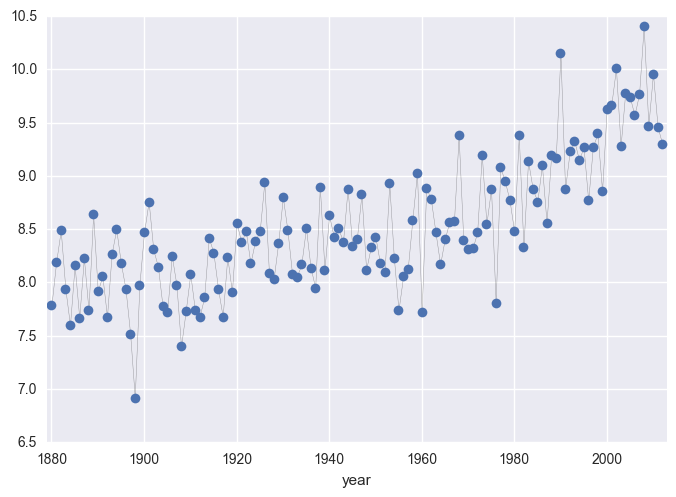

In [7]:
# Levanto los datos
df = pd.read_csv('./data/worldTemperature.csv', ' ', header = None, names = (['year', 'temp']))
print("Decripcion de los datos")
print(df.describe())

print("\nLas primeras 8 filas de los datdos")
print(df.head(8))

# Graficos los datos
ax = sns.tsplot(time=df['year'], data=df['temp'], interpolate=False)
sns.plt.show()

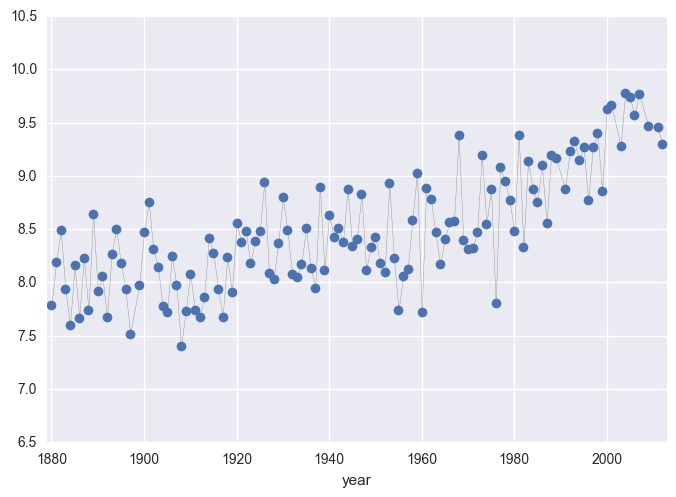

In [8]:
# Limpio los outliers
def mascara_outliers(s):
    return abs(s - s.mean()) <= 2*s.std()
    
mascara = mascara_outliers(df['temp'])
df = df[mascara]
sns.tsplot(time=df['year'], data=df['temp'], interpolate=False)

# Para que se evidencien mejor los outliers que saque, grafico en el mismo rango
# Algunos me parecen que no deberian ser removidos
sns.plt.ylim((6.5, 10.5))
sns.plt.show()

In [9]:
# Uso cuadrados minimos para predecir
sns.tsplot(time=df['year'], data=df['temp'], interpolate=False)

def armar_matriz_A(s):
    temp = []
    for t in s:
        temp.append([np.cos(450*t),np.sin(250*t),np.tan(25*t),np.cos(35*t),np.cos(60*t),np.sin(20*t),t, 1])
    return np.array(temp)

def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion):
    regr = linear_model.LinearRegression(fit_intercept=False)
    ECM = []
    # Entreno el modelo
    df_e = df[df['year'].isin(rango_entrenamiento)]
    A_e = armar_matriz_A(df_e['year'])
    regr.fit(A_e, df_e['temp'])

    # Me fijo la aproximacion que se realizo
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['year'], data=df_e['p'], color='r',legend=True, condition='entrenamiento')
    
    ECM.append(sum((df_e['p']-df_e['temp'])**2)/len(rango_prediccion))
    # Realizo predicciones
    df_p = df[df['year'].isin(rango_prediccion)]

    A_p = armar_matriz_A(df_p['year'])
    df_p['p'] = regr.predict(A_p)
    sns.tsplot(time=df_p['year'], data=df_p['p'], color='g',legend=True, condition='Predicción')

    ECM.append(sum((df_p['p']-df_p['temp'])**2)/len(rango_prediccion))
    return ECM

def entrenar_y_pronosticar(df, rango_entrenamiento, rango_prediccion):
    regr = linear_model.LinearRegression(fit_intercept=False)
    ECM = []
    # Entreno el modelo
    df_e = df[df['year'].isin(rango_entrenamiento)]
    A_e = armar_matriz_A(df_e['year'])
    regr.fit(A_e, df_e['temp'])

    # Me fijo la aproximacion que se realizo
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['year'], data=df_e['p'], color='r',legend=True,condition='Entrenamiento')
    
    # Realizo predicciones

    A_p = armar_matriz_A(rango_prediccion)
    df_p = regr.predict(A_p)
    sns.tsplot(time=rango_prediccion, data=df_p, color='g',legend=True,condition='Pronóstico')

    return 

def predecir(k):
    return entrenar_y_predecir_en_rangos(df, range(k-35,k), range(k,k+10))

def pronosticar(k):
    return entrenar_y_pronosticar(df, range(k-35,k), range(k,k+10))



[0.29151682343368812, 0.11852499710083061]
[0.30033678669400743, 0.17339712139538349]
[0.32677052140109125, 0.072773349391645967]
[0.24870084873227291, 0.17431561717260707]
[0.2211390020360664, 0.16557867755677674]
[0.31315875430355211, 0.12373639870009527]
[0.31122632987016641, 0.17751334492967202]
[0.30632451475362149, 0.045403524884708876]
[0.19606487974722975, 0.11583457475062761]
Error promedio de entrenamiento:0.279
Error promedio de prediccion:0.130


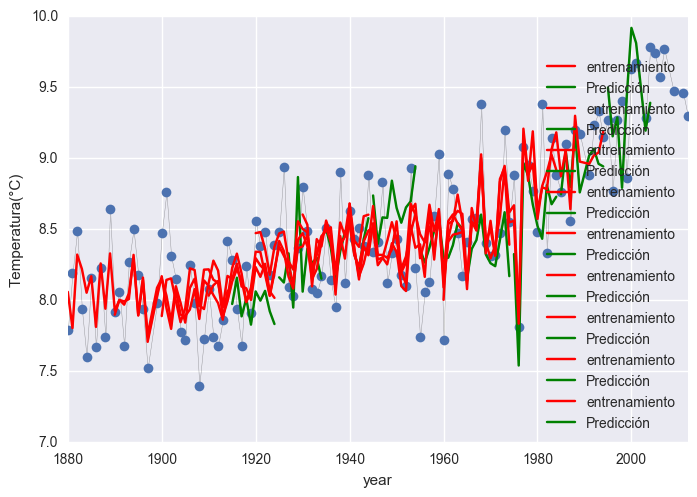

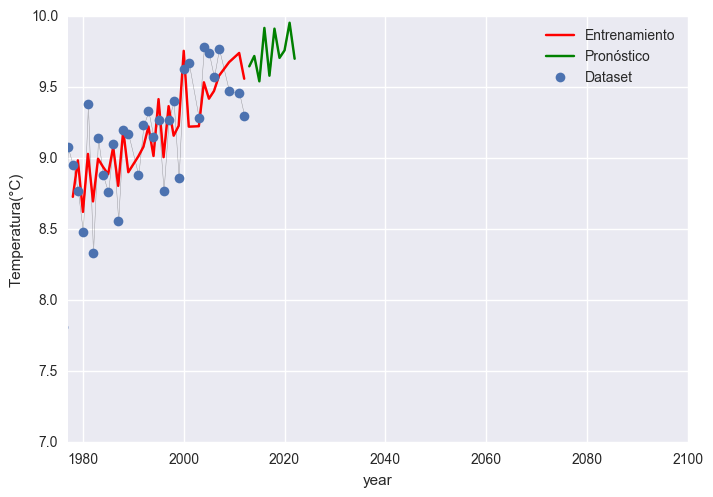

[0.31122632987016641, 0.17751334492967202]
[0.30632451475362149, 0.045403524884708876]


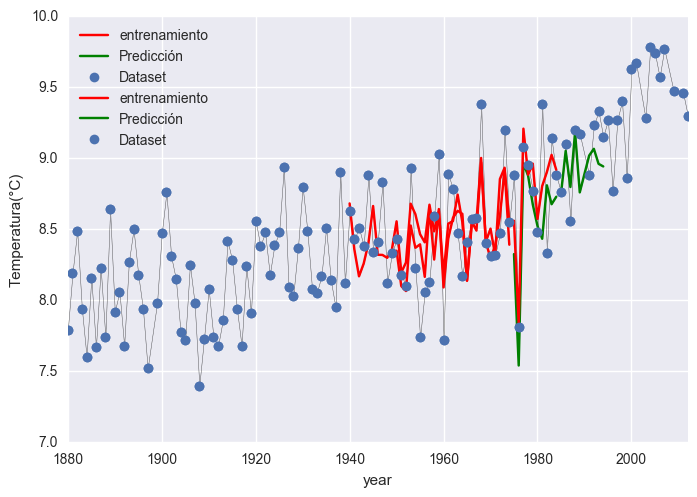

In [10]:
#Varios casos de entrenamiento
er_train = []
er_pred = []

for year in range(1915,2005,10):
    ECM = predecir(year)
    print(ECM)
    er_train.append(ECM[0])
    er_pred.append(ECM[1])


print("Error promedio de entrenamiento:{:.3f}".format(np.array(er_train).mean()))
print("Error promedio de prediccion:{:.3f}".format(np.array(er_pred).mean()))
sns.plt.xlim((1880, 2012))
plt.ylabel('Temperatura(°C)')
sns.plt.show()


#Grafico pronostico a futuro
pronosticar(2013)
sns.tsplot(time=df['year'], data=df['temp'], interpolate=False,legend=True,condition="Dataset")
sns.plt.xlim((2012-35, 2100))
plt.ylabel('Temperatura(°C)')
sns.plt.show()

#Elegir uno de los graficos en algun intervalo y mostrarlo en el informe, por ejemplo:
ECM = predecir(1975)
print(ECM)    
sns.tsplot(time=df['year'], data=df['temp'], interpolate=False,legend=True,condition='Dataset')
sns.plt.xlim((1880, 2012))
plt.ylabel('Temperatura(°C)')


ECM = predecir(1985)
print(ECM)    
sns.tsplot(time=df['year'], data=df['temp'], interpolate=False,legend=True,condition='Dataset')
sns.plt.xlim((1880, 2012))
plt.ylabel('Temperatura(°C)')
sns.plt.show()







In [13]:
#Experimento 2:

In [11]:
#Funciones de entrenamiento y creación de la matriz adaptadas a experimentos multivariados

#S es una matriz. Cada fila contiene X_i grande(un vector de temperaturas por pais para un año determinado)
def armar_matriz_A_multivar(s):
    temp = []
    for t in s:
        #Aca va la familia de funciones, cambiar segun expermiento. 
        #Sin la constante 
        temp.append([t.mean(), 1])
    return np.array(temp)

        

def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion, paises):
    regr = linear_model.LinearRegression(fit_intercept=False)
    ECM = []
    # Entreno el modelo
    df_e = df[df['year'].isin(rango_entrenamiento)]
    df_aux = df_e.ix[:,2:paises + 2]
    
    A_e = armar_matriz_A_multivar(df_aux.values)
    regr.fit(A_e, df_e['world'])

    # Me fijo la aproximacion que se realizo
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['year'], data=df_e['p'], color='r')
    
    ECM.append(sum((df_e['p']-df_e['world'])**2)/len(rango_prediccion))
    
    # Realizo predicciones
    df_p = df[df['year'].isin(rango_prediccion)]
    df_aux = df_p.ix[:,2:paises + 2]
    A_p = armar_matriz_A_multivar(df_aux.values)
    df_p['p'] = regr.predict(A_p)
    sns.tsplot(time=df_p['year'], data=df_p['p'], color='g')

    ECM.append(sum((df_p['p']-df_p['world'])**2)/len(rango_prediccion))
    return ECM

def predecir(k, paises):
    return entrenar_y_predecir_en_rangos(df, range(k-35,k), range(k,k+10), paises)

[0.20185988103662419, 0.060558538628652438]
[0.26183598515067269, 0.097092952507748603]
[0.27246919546177384, 0.12546582695557396]
[0.29738452653676506, 0.098207924342154834]
[0.2636206936734552, 0.19418072732762581]
[0.39815837661762332, 0.16865211097957034]
[0.4396957943633707, 0.21921017387814387]
[0.52449044877842232, 0.089972986228292848]
[0.42856847585196878, 0.060533987140410195]
Error promedio de entrenamiento: 0.343
Error promedio de prediccion: 0.124


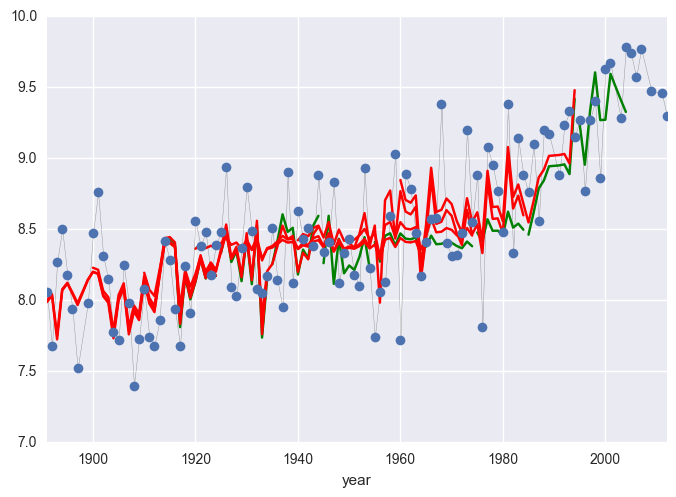

In [12]:
#Experimento 2.0
#Elegir representantes caracteristicos de cada clima (porque dicho clima representa la mayor parte del pais)
#Ademas el pais intenta ser lo mas grande posible dentro del clima elegido. 

# Levanto los datos de cada pais, las mediciones son por mes
# Como los años que no aparecen son los mismos para todos, yo tomaría a partir de 1891, que están todos
# Canada:

df_countries = pd.read_csv('./data/paises/Canada.csv',' ',header = None, names = ['year', 'Canada'])
df_countries['year'] = df_countries['year'].map(lambda x: int(math.modf(x)[1]))

# (Notar que este bucle vuelve a levantar Canada.csv)
# Repito para el resto
for filename in os.listdir('./data/paises/'):
    if os.path.isfile('./data/paises/' + filename) and filename != 'Canada.csv':
        aux = pd.read_csv('./data/paises/'+filename,' ',header = None, names = ['year', 'temp'])
        aux['year'] = aux['year'].map(lambda x: int(math.modf(x)[1]))
        filename = filename[:len(filename) - 5]
        df_countries[filename] = aux.temp

# Calculo el promedio anual de cada país
df = df_countries.groupby('year').mean().reset_index()

# Como los datos son consecutivos desde 1891, me quedo con ese subconjunto
df = (df[df['year'].isin(range(1891,2013))]).reset_index()

# Agrego la temperatura del planeta
df_world = pd.read_csv('./data/worldTemperature.csv', ' ', header = None, names = ['x', 'y'])
df_world = (df_world[df_world['x'].isin(range(1891,2013))]).reset_index()
df['world'] = df_world.y
mascara = mascara_outliers(df['world'])
df = df[mascara]

#Ahora aplico CM y grafico:
# Segundo parámetro: cant. de países en el dataframe

#Varios casos de entrenamiento
er_train = []
er_pred = []

for year in range(1915,2005,10):
    ECM = predecir(year,10)
    print(ECM)
    er_train.append(ECM[0])
    er_pred.append(ECM[1])


print("Error promedio de entrenamiento: {:.3f}".format(np.array(er_train).mean()))
print("Error promedio de prediccion: {:.3f}".format(np.array(er_pred).mean()))
sns.tsplot(time=df['year'], data=df['world'], interpolate=False)
sns.plt.xlim((1891, 2012))
sns.plt.show()

#Elegir dos intervalos (mejor/peor?) y plotear para mostrar en el informe

#Fin expermiento 2.0

Colombia.csv
Egypt.csv
Germany.csv
Greenland.csv
Italy.csv
Mongolia.csv
Paraguay.csv
Ukraine.csv
Zambia.csv
[0.11141272703295049, 0.096732987198959286]
[0.14872216288683099, 0.14261482606426626]
[0.19516417791731616, 0.064438557268569951]
[0.11165224199169613, 0.19959648514820855]
[0.1384402188549704, 0.34199311163118834]
[0.25000316133988548, 0.14446079769762329]
[0.32845806420577783, 0.13811739273351317]
[0.25379794461617661, 0.21800570415192749]
[0.27363013766543159, 0.12673131629955631]
Error promedio de entrenamiento: 0.201
Error promedio de prediccion: 0.164


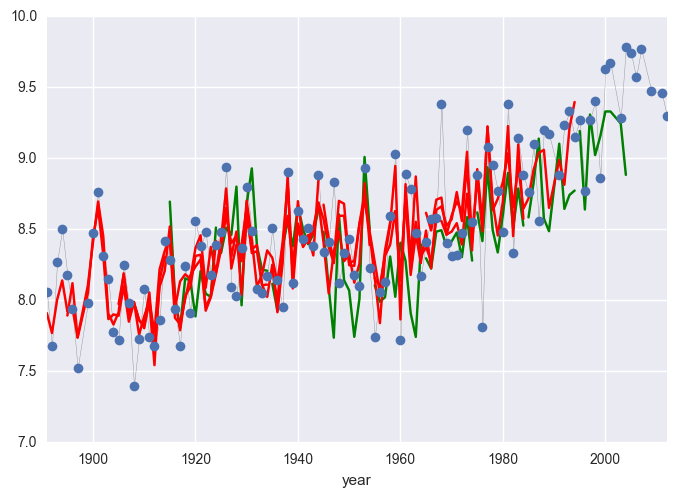

[0.23425615139294992, 0.17236169177812038]


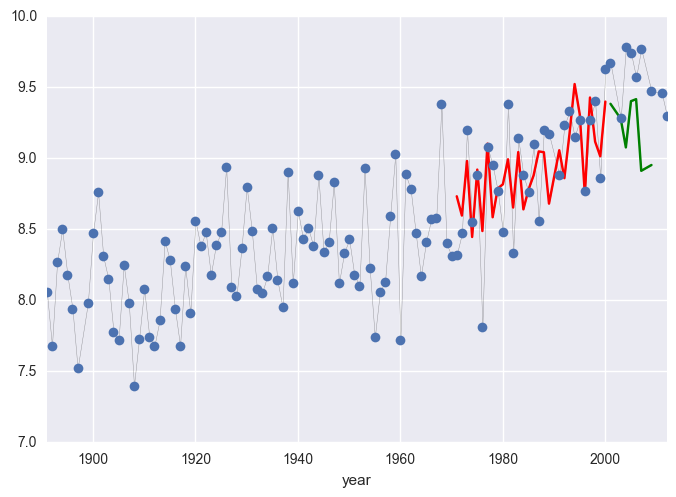

In [13]:
#Experimento 2.1


def armar_matriz_A_multivar_2(s,w):
    temp = []
    for t in s:
        temp.append([np.cos(t[0]),np.cos(t[1]),np.cos(t[2]),np.cos(t[3]),np.cos(t[4]),np.cos(t[5]),np.cos(t[6]),np.cos(t[7]),np.cos([8]),1])
    return np.array(temp)


def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion, w, paises):
    regr = linear_model.LinearRegression(fit_intercept=False)
    ECM = []
    # Entreno el modelo
    df_e = df[df['year'].isin(rango_entrenamiento)]
    df_aux = df_e.ix[:,2:paises + 2]
    
    A_e = armar_matriz_A_multivar_2(df_aux.values,w)
    regr.fit(A_e, df_e['world'])

    # Me fijo la aproximacion que se realizo
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['year'], data=df_e['p'], color='r')
    
    ECM.append(sum((df_e['p']-df_e['world'])**2)/len(rango_prediccion))
    
    # Realizo predicciones
    df_p = df[df['year'].isin(rango_prediccion)]
    df_aux = df_p.ix[:,2:paises + 2]
    A_p = armar_matriz_A_multivar_2(df_aux.values,w)
    df_p['p'] = regr.predict(A_p)
    sns.tsplot(time=df_p['year'], data=df_p['p'], color='g')

    ECM.append(sum((df_p['p']-df_p['world'])**2)/len(rango_prediccion))
    return ECM

def predecir(k, paises,w):
    return entrenar_y_predecir_en_rangos(df, range(k-30,k), range(k,k+10), w, paises)



#Utilizando promedio pesado segun importancia del clima
#Levanto los datos de cada pais, las mediciones son por mes
    
# Canada:
df_countries = pd.read_csv('./data/paises/Canada.csv',' ',header = None, names = ['year', 'Canada'])
df_countries['year'] = df_countries['year'].map(lambda x: int(math.modf(x)[1]))

# Repito para el resto
for filename in os.listdir('./data/paises/'):
    if os.path.isfile('./data/paises/' + filename) and filename != 'Canada.csv':
        print (filename)
        aux = pd.read_csv('./data/paises/'+filename,' ',header = None, names = ['year', 'temp'])
        aux['year'] = aux['year'].map(lambda x: int(math.modf(x)[1]))
        filename = filename[:len(filename) - 5]
        df_countries[filename] = aux.temp

# Calculo el promedio anual de cada país
df = df_countries.groupby('year').mean().reset_index()

# Como los datos son consecutivos desde 1891, me quedo con ese subconjunto
df = (df[df['year'].isin(range(1891,2013))]).reset_index()

# Agrego la temperatura del planeta
df_world = pd.read_csv('./data/worldTemperature.csv', ' ', header = None, names = ['x', 'y'])
df_world = (df_world[df_world['x'].isin(range(1891,2013))]).reset_index()
df['world'] = df_world.y
mascara = mascara_outliers(df['world'])
df = df[mascara]

#Ahora aplico CM y grafico:
# Segundo parámetro: cant. de países en el dataframe
#Tercer parametro w: pesos por paises

#Ahora aplico CM y grafico:
# Segundo parámetro: cant. de países en el dataframe

#Varios casos de entrenamiento
er_train = []
er_pred = []

w= [0.19,0.1,0.09,0.1,0.08,0.02,0.16,0.15,0.09,0.02]

for year in range(1915,2005,10):
    ECM = predecir(year,10,w)
    print(ECM)
    er_train.append(ECM[0])
    er_pred.append(ECM[1])


print("Error promedio de entrenamiento: {:.3f}".format(np.array(er_train).mean()))
print("Error promedio de prediccion: {:.3f}".format(np.array(er_pred).mean()))
sns.tsplot(time=df['year'], data=df['world'], interpolate=False)
sns.plt.xlim((1891, 2012))
sns.plt.show()

ECM = predecir(2001,10,w)
print(ECM)
sns.tsplot(time=df['year'], data=df['world'], interpolate=False)
sns.plt.xlim((1891, 2012))
sns.plt.show()

#Elegir dos intervalos (mejor/peor?) y plotear para mostrar en el informe

#Fin expermiento 2.1



In [14]:
#Experimento 2.2 (ejecutarlo sin compilar la celda anterior para que no tire error con la funcion predecir. Hacerlo con la IN[175])
#Elegir varios representantes de cada clima y promediarlos obteniendo la tempertaura promedio anual de un clima dado.
# Se divide en 3 regiones: Low Latitude, Mid Latitude, High Latitude; que a la vez se subdivide en tres grupos
# Se tienen hasta 9 representantes por cada grupo, hasta 3 por cada subgrupo
# Low Latitude comprende más region, si lo hacemos pesado, debería ser el que tiene más peso

# Inicializo un dataframe para cada region
df_lowLat = pd.read_csv('./data/paises/lowLat/Brazil.csv', ' ',header = None, names = ['year', 'Brazil'])
df_lowLat['year'] = df_lowLat['year'].map(lambda x: int(math.modf(x)[1]))

df_midLat = pd.read_csv('./data/paises/midLat/China.csv', ' ',header = None, names = ['year', 'China'])
df_midLat['year'] = df_midLat['year'].map(lambda x: int(math.modf(x)[1]))

df_highLat = pd.read_csv('./data/paises/highLat/Canada.csv', ' ',header = None, names = ['year', 'Canada'])
df_highLat['year'] = df_highLat['year'].map(lambda x: int(math.modf(x)[1]))

regions = ['lowLat', 'midLat', 'highLat']

for region in regions:
    for filename in os.listdir('./data/paises/' + region + '/'):
        if region == 'lowLat' and filename != 'Brazil.csv':
            aux = pd.read_csv('./data/paises/' + region + '/' + filename, ' ', header = None, names = ['year', 'temp'])
            aux['year'] = aux['year'].map(lambda x: int(math.modf(x)[1]))
            filename = filename[:len(filename) - 5]
            df_lowLat[filename] = aux.temp
        elif region == 'midLat' and filename != 'China.csv':
            aux = pd.read_csv('./data/paises/' + region + '/' + filename, ' ', header = None, names = ['year', 'temp'])
            aux['year'] = aux['year'].map(lambda x: int(math.modf(x)[1]))
            filename = filename[:len(filename) - 5]
            df_midLat[filename] = aux.temp
        elif region == 'highLat' and filename != 'Canada.csv':
            aux = pd.read_csv('./data/paises/' + region + '/' + filename, ' ', header = None, names = ['year', 'temp'])
            aux['year'] = aux['year'].map(lambda x: int(math.modf(x)[1]))
            filename = filename[:len(filename) - 5]
            df_highLat[filename] = aux.temp

# Calculo el promedio anual de los países de cada región
df_lowLat  = df_lowLat.groupby('year').mean()
df_midLat  = df_midLat.groupby('year').mean()
df_highLat = df_highLat.groupby('year').mean()

# Obtengo el promedio anual de cada region
df_lowLat['lowLat']   = df_lowLat.mean(axis = 1)
df_midLat['midLat']   = df_midLat.mean(axis = 1)
df_highLat['highLat'] = df_highLat.mean(axis = 1)

# Necesario para que los años sean una key, y así poder manipularlos mejor (para plotear, por ej)
df_lowLat   = df_lowLat.reset_index() 
df_midLat   = df_midLat.reset_index()
df_highLat  = df_highLat.reset_index()
# Acomodo los rangos
# En df voy a juntar todo
df         = (df_lowLat[df_lowLat['year'].isin(range(1891,2013))]).reset_index()
df_midLat  = (df_midLat[df_midLat['year'].isin(range(1891,2013))]).reset_index()
df_highLat = (df_highLat[df_highLat['year'].isin(range(1891,2013))]).reset_index()

# uno los dataframes
df['midLat']  = df_midLat.midLat
df['highLat'] = df_highLat.highLat

# Agrego la temperatura del planeta
df_world = pd.read_csv('./data/worldTemperature.csv', ' ', header = None, names = ['x', 'y'])
df_world = (df_world[df_world['x'].isin(range(1891,2013))]).reset_index()
df['world'] = df_world.y
mascara = mascara_outliers(df['world'])
df = df[mascara]
# Y me quedo con lo que me importa
# (Me guardo la columna index para que sea retrocompatible con el método predecir)
df = df[['index', 'year', 'lowLat', 'midLat', 'highLat', 'world']]

#Ahora aplico CM y grafico:
# Segundo parámetro: cant. de países en el dataframe


#Varios casos de entrenamiento
er_train = []
er_pred = []

for year in range(1921,2001,10):
    ECM = predecir(year,3)
    print(ECM)
    er_train.append(ECM[0])
    er_pred.append(ECM[1])


print("Error promedio de entrenamiento: {:.3f}".format(np.array(er_train).mean()))
print("Error promedio de prediccion: {:.3f}".format(np.array(er_pred).mean()))
sns.tsplot(time=df['year'], data=df['world'], interpolate=False)
sns.plt.xlim((1891, 2012))
sns.plt.show()

#Elegir dos intervalos (mejor/peor?) y plotear para mostrar en el informe

#Fin experimento 2.2


TypeError: predecir() missing 1 required positional argument: 'w'

In [ ]:
#Experimento 3': Predecir la altura sobre el nivel del mar a partir de los años
#No funciona tan bien como esperaba. Pero, asumiendo que el error con raiz esta en las mismas unidades que las medidas originales (mm), no parece tan terrible para lo que se busca


def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion):
    regr = linear_model.LinearRegression(fit_intercept=False)
    ECM = []
    # Entreno el modelo
    df_e = df[df['year'].isin(rango_entrenamiento)]
    A_e = armar_matriz_A(df_e['year'])
    regr.fit(A_e, df_e['gmsl'])

    # Me fijo la aproximacion que se realizo
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['year'], data=df_e['p'], color='r')
    
    ECM.append(math.sqrt(sum((df_e['p']-df_e['gmsl'])**2)/len(rango_prediccion)))
    # Realizo predicciones
    df_p = df[df['year'].isin(rango_prediccion)]
    A_p = armar_matriz_A(df_p['year'])
    df_p['p'] = regr.predict(A_p)
    sns.tsplot(time=df_p['year'], data=df_p['p'], color='g')

    ECM.append(math.sqrt(sum((df_p['p']-df_p['gmsl'])**2)/len(rango_prediccion)))
    return ECM

def entrenar_y_pronosticar(df, rango_entrenamiento, rango_prediccion):
    regr = linear_model.LinearRegression(fit_intercept=False)
    ECM = []
    # Entreno el modelo
    df_e = df[df['year'].isin(rango_entrenamiento)]
    A_e = armar_matriz_A(df_e['year'])
    regr.fit(A_e, df_e['gmsl'])

    # Me fijo la aproximacion que se realizo
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['year'], data=df_e['p'], color='r')
    
    # Realizo predicciones
    A_p = armar_matriz_A(rango_prediccion)
    df_p = regr.predict(A_p)
    sns.tsplot(time=rango_prediccion, data=df_p, color='g',condition='predicción')

    return 


def predecir(k):
    return entrenar_y_predecir_en_rangos(df, range(k-40,k), range(k,k+30))

def pronosticar(k):
    return entrenar_y_pronosticar(df, range(k-40,k), range(k,k+90))


def armar_matriz_A(s):
    temp = []
    for t in s:
        temp.append([t**4,t**2,1])
    return np.array(temp)


In [ ]:
# Inicializo un dataframe con GMSL
df_gmsl = pd.read_csv('./data/CSIRO_Recons_gmsl_yr_2015.csv',header = None,names =['year', 'gmsl','unc'])
df_gmsl = df_gmsl[['year','gmsl']]
#Transformo los años a enteros,cambio la referencia a 1880 y los tomo en el rango adecuado
df_gmsl['year'] = df_gmsl['year'].map(lambda x: int(math.modf(x)[1]))
df_gmsl['gmsl'] = df_gmsl['gmsl'].map(lambda x: x+158.7)
df_gmsl = df_gmsl[df_gmsl['year'].isin(range(1880,2013))]

#Cargo el df del mundo
df = pd.read_csv('./data/worldTemperature.csv', ' ', header = None, names = (['year', 'temp']))

#Tomo las temperaturas relativas a 1880
df['temp'] = df['temp'].map(lambda x: x-7.79)
df['gmsl'] = df_gmsl['gmsl']

mascara = mascara_outliers(df['gmsl'])
df = df[mascara]

#Veo correlacion entre las variables
corr = df.corr(method='pearson', min_periods=1)
#print(corr)



#Varios casos de entrenamiento
er_train = []
er_pred = []

for year in range(1920,1985,5):
    ECM = predecir(year)
    print(ECM)
    er_train.append(ECM[0])
    er_pred.append(ECM[1])


print("Error promedio de entrenamiento: {:.3f}".format(np.array(er_train).mean()))
print("Error promedio de prediccion: {:.3f}".format(np.array(er_pred).mean()))
sns.tsplot(time=df['year'], data=df['gmsl'], interpolate=False)
sns.plt.xlim((1890, 2025))
sns.plt.show()

#Grafico para informe, elegir uno bueno.


#Grafico de pronostico:
pronosticar(2012)
sns.tsplot(time=df['year'], data=df['gmsl'], interpolate=False)
sns.plt.xlim((1890, 2100))
sns.plt.show()





In [ ]:
#Experimento 3'.1: Predecir la altura sobre el nivel del mar a partir de la temperatura
#Rango vs folds?
def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_pred):
    regr = linear_model.LinearRegression(fit_intercept=False)
    ECM = []
    #Entreno el modelo
    
   # df_e = df[(df.cat >= x1) & (df.cat <= x2)]
    df_e = df[df.index.isin(rango_entrenamiento)]
    A_e = armar_matriz_A(df_e['cat'])
    regr.fit(A_e, df_e['gmsl'])

    # Me fijo la aproximacion que se realizo
    df_e['p'] = regr.predict(A_e)
    plt.plot(df_e['cat'],df_e['p'],'ro',color='r')
    #sns.tsplot(time=df_e['temp'], data=df_e['p'], color='r')
    
    ECM.append(math.sqrt(sum((df_e['p']-df_e['gmsl'])**2)/len(rango_entrenamiento)))
    
    # Realizo predicciones
    #df_p = df[(df.cat >= p1) & (df.cat <= p2)]
    df_p = df[df.index.isin(rango_pred)]
    A_p = armar_matriz_A(df_p['cat'])
    df_p['p'] = regr.predict(A_p)
    plt.plot(df_p['cat'],df_p['p'],'ro',color='g')
    #sns.tsplot(time=df_p['temp'], data=df_p['p'], color='g')

    ECM.append(math.sqrt(sum((df_p['p']-df_p['gmsl'])**2)/len(rango_pred)))
    return ECM

def entrenar_y_pronosticar(df, rango_entrenamiento, rango_prediccion):
    regr = linear_model.LinearRegression(fit_intercept=False)
    ECM = []
    # Entreno el modelo
    df_e = df[df['year'].isin(rango_entrenamiento)]
    A_e = armar_matriz_A(df_e['year'])
    regr.fit(A_e, df_e['gmsl'])

    # Me fijo la aproximacion que se realizo
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['year'], data=df_e['p'], color='r')
    
    # Realizo predicciones
    A_p = armar_matriz_A(rango_prediccion)
    df_p = regr.predict(A_p)
    sns.tsplot(time=rango_prediccion, data=df_p, color='g')

    return 


def predecir(k):
    return entrenar_y_predecir_en_rangos(df_aux, range(k-20,k), range(k,k+10))

def pronosticar(k):
    return entrenar_y_pronosticar(df, range(k-50,k), range(k,k+30))


def armar_matriz_A(s):
    temp = []
    for t in s:
        temp.append([np.sqrt(abs(t)),t])
    return np.array(temp)

    


In [ ]:
#Varios casos de entrenamiento
er_train = []
er_pred = []


#sns.tsplot(time=df['year'], data=df['gmsl'], interpolate=False)
#sns.plt.xlim((1890, 2013))
# Limpio los outliers

#plt.plot(df['temp'],df['gmsl'],'ro',color='blue')

#sns.plt.show()
nbins = 77
bins = np.linspace(-1,2.8,nbins)
lbls = np.linspace(-0.975,2.775,76)
lbls

categories = pd.cut(df['temp'], bins)
df['categories'] = pd.cut(df['temp'], bins)
df_aux = df.groupby('categories')[['gmsl']].mean().reset_index()
df_aux['cat'] = lbls
df_aux = df_aux[pd.notnull(df_aux['gmsl'])].reset_index()


for x in range (20,37,1):
    ECM = predecir(x)
    print(ECM)
    er_train.append(ECM[0])
    er_pred.append(ECM[1])

print("Error promedio de entrenamiento: {:.3f}".format(np.array(er_train).mean()))
print("Error promedio de prediccion: {:.3f}".format(np.array(er_pred).mean()))
plt.plot(df_aux['cat'],df_aux['gmsl'],'ro',color='b')
sns.plt.show()

#Grafico para informe, elegir uno bueno.


#Grafico de pronostico:
#pronosticar(2012)
#sns.tsplot(time=df['year'], data=df['gmsl'], interpolate=False)
#sns.plt.xlim((1890, 5012))
#sns.plt.ylim((100, 13000))
#sns.plt.show()

[0.19888958404182439, 0.03839993373853938]
Error promedio de entrenamiento: 0.199
Error promedio de prediccion: 0.038


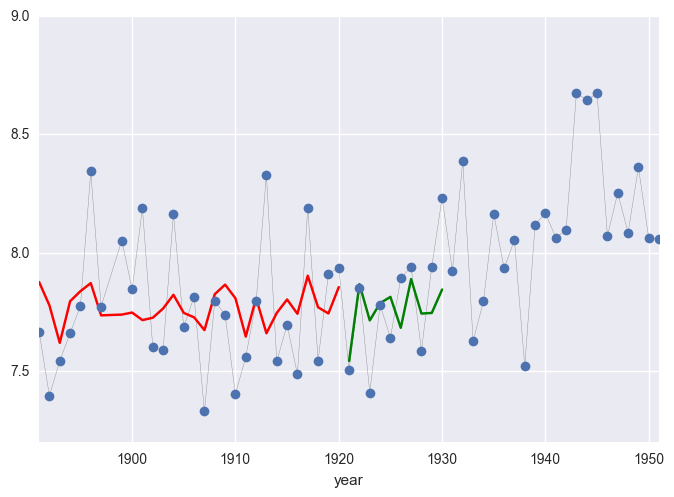

In [24]:
#Funciones de entrenamiento y creación de la matriz adaptadas a experimentos multivariados

#S es una matriz. Cada fila contiene X_i grande(un vector de temperaturas por pais para un año determinado)
def armar_matriz_A_multivar(s):
    temp = []
    for t in s:
        #Aca va la familia de funciones, cambiar segun expermiento. 
        #Sin la constante 
        temp.append([t.mean(),np.cos(10*np.mean(t)),np.sin(10*np.mean(t)),np.tan(10*np.mean(t)),t[0]**2,t[6]**2,1])
    return np.array(temp)

def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion, ciudades):
    regr = linear_model.LinearRegression(fit_intercept=False)
    ECM = []
    # Entreno el modelo
    df_e = df[df['year'].isin(rango_entrenamiento)]
    df_aux = df_e.ix[:, 1:ciudades + 1]
    
    A_e = armar_matriz_A_multivar(df_aux.values)
    regr.fit(A_e, df_e['Bariloche'])

    # Me fijo la aproximacion que se realizo
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['year'], data=df_e['p'], color='r')
    
    ECM.append(sum((df_e['p']-df_e['Bariloche'])**2)/len(rango_prediccion))
    
    # Realizo predicciones
    df_p = df[df['year'].isin(rango_prediccion)]
    df_aux = df_p.ix[:, 1:ciudades + 1]
    A_p = armar_matriz_A_multivar(df_aux.values)
    df_p['p'] = regr.predict(A_p)
    sns.tsplot(time=df_p['year'], data=df_p['p'], color='g')

    ECM.append(sum((df_p['p']-df_p['Bariloche'])**2)/len(rango_prediccion))
    return ECM

def predecir(k, ciudades):
    return entrenar_y_predecir_en_rangos(df, range(k-35,k), range(k,k+10), ciudades)

#Experimento 4.0
#Elegir ciudades que estan en la misma altitud que bariloche pero en el hemisferio norte

# Levanto los datos de cada ciudad, las mediciones son por mes
# Como los años que no aparecen son los mismos para todos, yo tomaría a partir de 1891, que están todos

df_cities = pd.read_csv('./data/ciudadesPrueba/Bern.csv',' ',header = None, names = ['year', 'Bern'])
df_cities['year'] = df_cities['year'].map(lambda x: int(math.modf(x)[1]))
df_cities = (df_cities[df_cities['year'].isin(range(1891, 2013))]).reset_index(drop=True)

# Repito para el resto
for filename in os.listdir('./data/ciudadesPrueba/'):
    if os.path.isfile('./data/ciudadesPrueba/' + filename) and filename != 'Bern.csv':
        aux = pd.read_csv('./data/ciudadesPrueba/'+filename,' ',header = None, names = ['year', 'temp'])
        aux['year'] = aux['year'].map(lambda x: int(math.modf(x)[1]))
        aux = (aux[aux['year'].isin(range(1891, 2013))]).reset_index(drop=True)
        filename = filename[:len(filename) - 4]
        df_cities[filename] = aux.temp

# Agrego la temperatura de Bariloche
df_bariloche = pd.read_csv('./data/San_Carlos_De_Bariloche.csv', ' ', header = None, names = ['x', 'y'])
#df_bariloche = pd.read_csv('./data/Comodoro_Rivadavia.csv', ' ', header = None, names = ['x', 'y'])
df_bariloche['x'] = df_bariloche['x'].map(lambda x: int(math.modf(x)[1])) 
df_bariloche = (df_bariloche[df_bariloche['x'].isin(range(1891,2013))]).reset_index(drop=True)
df_cities['Bariloche'] = df_bariloche.y
# Calculo el promedio anual
df = df_cities.groupby('year').mean().reset_index()
# Remuevo outliers
mascara = mascara_outliers(df['Bariloche'])
df = df[mascara]

#Ahora aplico CM y grafico:

#Varios casos de entrenamiento
er_train = []
er_pred = []

for year in range(1921, 1931, 10):
    # Segundo parámetro: cant. de ciudades incluidas en el entrenamiento
    # No se incluye a la que se desea predecir (en este caso, Comodoro Rivadavia)
    ECM = predecir(year, 8)
    print(ECM)
    er_train.append(ECM[0])
    er_pred.append(ECM[1])

print("Error promedio de entrenamiento: {:.3f}".format(np.array(er_train).mean()))
print("Error promedio de prediccion: {:.3f}".format(np.array(er_pred).mean()))
sns.tsplot(time=df['year'], data=df['Bariloche'], interpolate=False)
sns.plt.xlim((1891, 1951))
sns.plt.show()


#Fin expermiento 4.0